<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo6/Capitulo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capítulo 6 - Validação e Métricas de Performance**

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo, initial='7300 days', period='1825 days', horizon = '3650 days')

INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1855-02-01,25.007475,24.694300,25.329337,25.430,1855-01-05
1,1855-03-01,24.821049,24.525459,25.141332,24.982,1855-01-05
2,1855-05-01,23.599898,23.309794,23.903574,24.067,1855-01-05
3,1855-06-01,22.972781,22.651037,23.270959,23.189,1855-01-05
4,1855-07-01,23.245705,22.935064,23.547826,23.147,1855-01-05
...,...,...,...,...,...,...
2805,1999-08-01,24.769523,24.402122,25.116532,24.743,1989-12-03
2806,1999-09-01,25.722331,25.353418,26.074782,26.109,1989-12-03
2807,1999-10-01,25.846282,25.488433,26.199919,25.922,1989-12-03
2808,1999-11-01,25.997271,25.635111,26.352622,25.723,1989-12-03


In [ ]:
df_cv['cutoff'].unique()

array(['1855-01-05T00:00:00.000000000', '1860-01-04T00:00:00.000000000',
       '1865-01-02T00:00:00.000000000', '1870-01-01T00:00:00.000000000',
       '1874-12-31T00:00:00.000000000', '1879-12-30T00:00:00.000000000',
       '1884-12-28T00:00:00.000000000', '1889-12-27T00:00:00.000000000',
       '1894-12-26T00:00:00.000000000', '1899-12-25T00:00:00.000000000',
       '1904-12-24T00:00:00.000000000', '1909-12-23T00:00:00.000000000',
       '1914-12-22T00:00:00.000000000', '1919-12-21T00:00:00.000000000',
       '1924-12-19T00:00:00.000000000', '1929-12-18T00:00:00.000000000',
       '1934-12-17T00:00:00.000000000', '1939-12-16T00:00:00.000000000',
       '1944-12-14T00:00:00.000000000', '1949-12-13T00:00:00.000000000',
       '1954-12-12T00:00:00.000000000', '1959-12-11T00:00:00.000000000',
       '1964-12-09T00:00:00.000000000', '1969-12-08T00:00:00.000000000',
       '1974-12-07T00:00:00.000000000', '1979-12-06T00:00:00.000000000',
       '1984-12-04T00:00:00.000000000', '1989-12-03

In [ ]:
janela = 1

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

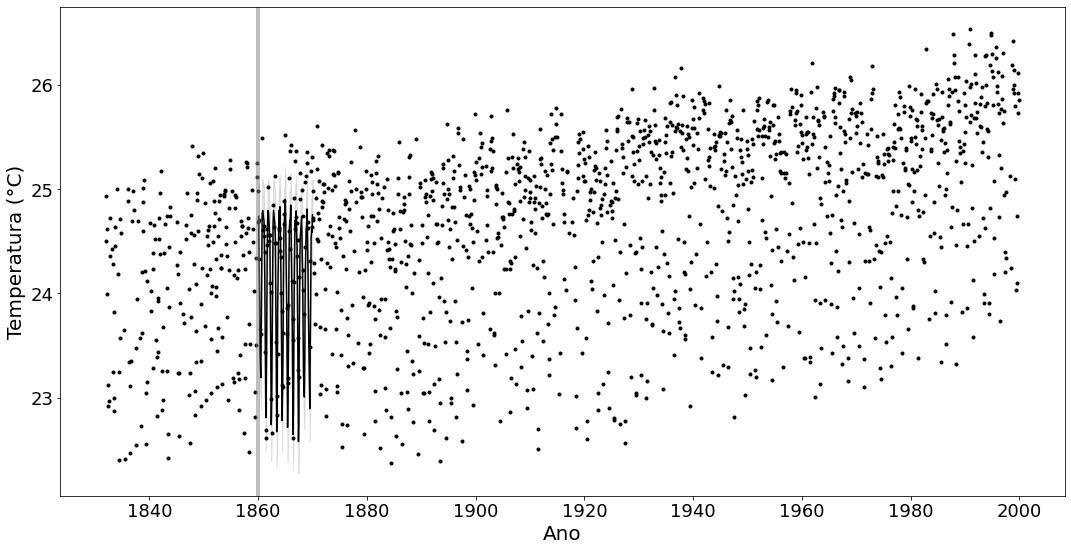

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], '.k')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='k')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='gray',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)
plt.show()

In [ ]:
janela = 10

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

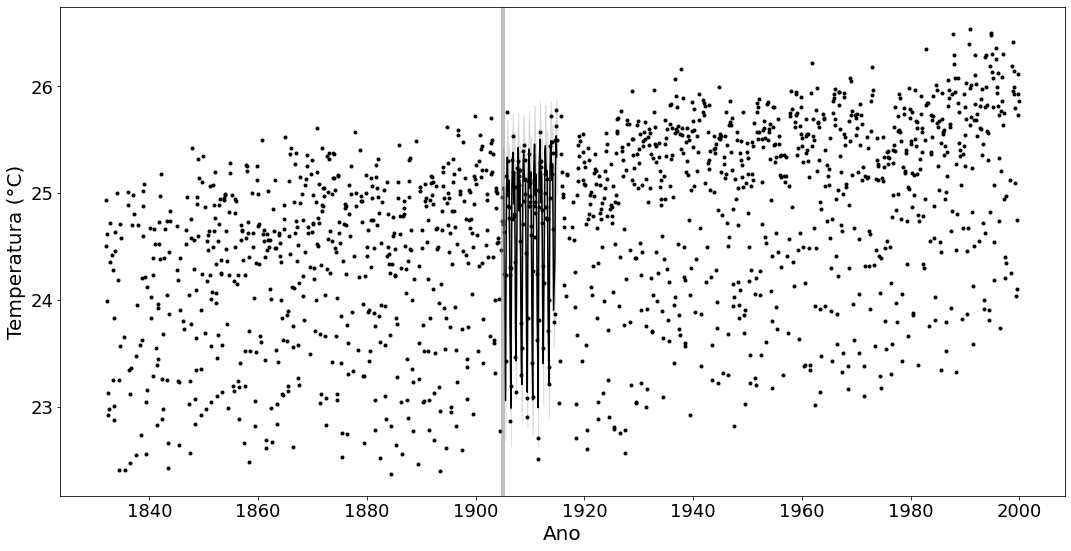

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='k')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='gray',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)
plt.show()

In [ ]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
df_p = performance_metrics(df_cv)

In [ ]:
df_p.head().T

,0,1,2,3,4
horizon,361 days 00:00:00,362 days 00:00:00,363 days 00:00:00,364 days 00:00:00,365 days 00:00:00
mse,0.089816,0.089014,0.08906,0.089433,0.090252
rmse,0.299693,0.298353,0.298429,0.299053,0.300421
mae,0.250628,0.249174,0.249267,0.250175,0.251084
mape,0.010163,0.010103,0.010105,0.01014,0.010177
mdape,0.009494,0.009363,0.009494,0.009506,0.009506
coverage,0.729537,0.733096,0.733096,0.729537,0.725979


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


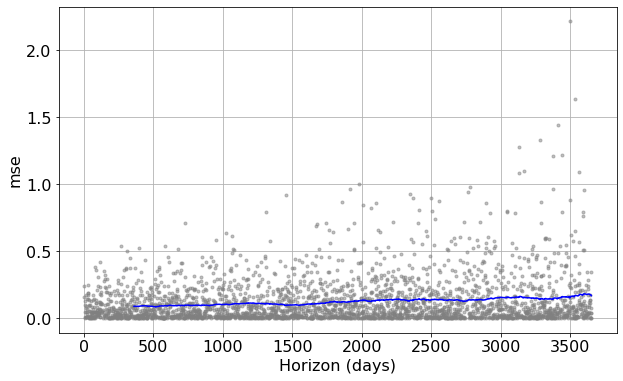

In [ ]:
plot_cross_validation_metric(df_cv,metric='mse'); 